In [ ]:
# Boilerplate at top of file
%load_ext autoreload

%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from ggplot import *


### Custom
import nltk
import sys
sys.path.append('../')
import cleaner
from feature_eng import FeatureFactory

In [85]:
df_train = pd.read_csv('../data/train_sample.csv', encoding='ISO-8859-1')

In [ ]:
ff = FeatureFactory(corpus_csv='../data/product_descriptions.csv', pickle_path = '../pickles/')

In [86]:

# df_train = pd.read_csv('../data/train_joined.csv', encoding='ISO-8859-1')


df_train_feats = ff.apply_feature_eng(df_train, verbose=True)


Computing feature  ['NumOfWordsInSearchTerm']
Computing feature  ['NumOfCharsInSearchTerm']
Computing feature  ['NumOfWordsInTitle']
Computing feature  ['NumOfCharsInTitle']
Computing feature  ['NumOfWordsInProdDescrip']
Computing feature  ['NumOfCharsInProdDescrip']
Computing feature  ['NumOfCharsInBrand']
Computing feature  ['SearchAndTitleMatch']


UnicodeEncodeError: 'ascii' codec can't encode character u'\xe8' in position 10: ordinal not in range(128)

In [79]:
feature_columns = ff.get_feature_names()
ff.get_feature_descriptions()

[(['NumOfWordsInSearchTerm'], ['Number of words in the search term']),
 (['NumOfCharsInSearchTerm'], ['Number of characters in the search term']),
 (['NumOfWordsInTitle'], ['Number of words in the product title']),
 (['NumOfCharsInTitle'], ['Number of characters in the product title']),
 (['NumOfWordsInProdDescrip'], ['Number of words in the product description']),
 (['NumOfCharsInProdDescrip'],
  ['Number of characters in the product description']),
 (['NumOfCharsInBrand'], ['Number of characters in the product brand']),
 (['SearchAndTitleMatch'], ['Is the search term in the product title?']),
 (['SearchAndTitleNAdjMatch'], ['Is the search term in the product title?']),
 (['SearchAndDescriptionMatch'],
  ['How does the search term match the product description?']),
 (['SearchAndDescriptionNAdjMatch'],
  ['How does the search term match the product description, nouns and adjectives?']),
 (['SearchAndProductBrandMatch'], ['Does the search term have a product?']),
 (['SearchAndProductBul

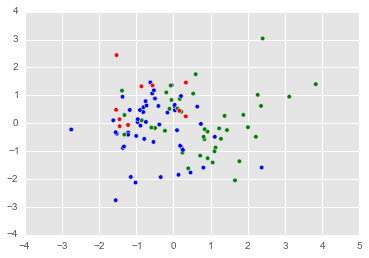

In [83]:
from sklearn.lda import LDA

lda = LDA()
X = lda.fit_transform(df_train[feature_columns], np.round(df_train['relevance']))
Y = np.round(df_train['relevance']) - 1
colors=['red', 'blue', 'green']
plt.scatter(X[:,0], X[:,1], c = map(lambda x: colors[int(x)], Y))

In [81]:
df_train[feature_columns]

,NumOfWordsInSearchTerm,NumOfCharsInSearchTerm,NumOfWordsInTitle,NumOfCharsInTitle,NumOfWordsInProdDescrip,NumOfCharsInProdDescrip,NumOfCharsInBrand,SearchAndTitleMatch,SearchAndTitleNAdjMatch,SearchAndDescriptionMatch,...,SearchAndProductSizeMatch,SearchAndProductWeightMatch,SearchAndProductSizeInRange,SearchAndProductWeightInRange,SearchAndProductLastWordMatch,SearchAndProductLastWordNAdjMatch,RatioOfDescripToSearch,RatioOfTitleToSearch,SearchDescriptionCountVectorizer,SearchDescriptionTfidfVectorizer
0,3,21,13,81,69,499,8,0,0,0,...,False,False,False,False,0,0,23,4,0.144338,0.129630
1,3,21,9,62,107,637,5,2,2,0,...,False,False,False,False,1,1,35,3,0.241955,0.249450
2,2,13,18,105,88,601,18,1,1,0,...,False,False,False,False,0,0,44,9,0.362473,0.353767
3,3,16,8,58,286,1717,6,1,1,0,...,False,False,False,False,0,0,95,2,0.188562,0.140551
4,2,9,13,68,61,392,12,0,0,0,...,False,False,False,False,0,0,30,6,0.000000,0.000000
5,3,18,14,90,145,904,14,2,2,0,...,False,False,False,False,0,0,48,4,0.359211,0.135160
6,2,9,7,38,84,571,3,1,1,0,...,False,False,False,False,0,0,42,3,0.116642,0.185533
7,3,20,8,53,90,649,7,1,1,0,...,False,False,False,False,0,0,30,2,0.066667,0.109129
8,4,22,16,81,71,469,7,2,2,0,...,False,False,False,False,0,0,17,4,0.217250,0.169899
9,3,12,13,69,166,1097,0,3,2,1,...,False,False,False,False,0,0,55,4,0.286910,0.236714


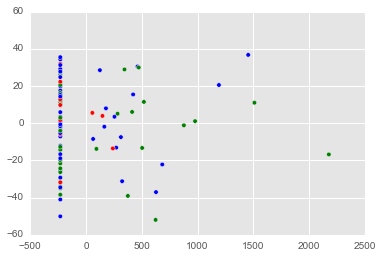

In [15]:
from sklearn.decomposition import pca

pca = pca.PCA(n_components=2)
X = pca.fit_transform(df_train[feature_columns])
colors=['red', 'blue', 'green']
plt.scatter(X[:,0], X[:,1], c = map(lambda x: colors[int(x)], Y))

# Regression Model

In [27]:
def try_stuff(row):
    return pd.Series({'feat_0': 0, 'feat_1': 1})
a = df_train.apply(try_stuff, axis=1)

In [33]:
df_train[['feat_0', 'feat_1']]= a

In [47]:
ff.feature_classes()[len(ff.feature_classes())-1].__dict__

<dictproxy {'__abstractmethods__': frozenset(),
 '__doc__': None,
 '__init__': <function feature_eng.__init__>,
 '__module__': 'feature_eng',
 '_abc_cache': <_weakrefset.WeakSet at 0x11353cb50>,
 '_abc_negative_cache': <_weakrefset.WeakSet at 0x11353c990>,
 '_abc_negative_cache_version': 37,
 '_abc_registry': <_weakrefset.WeakSet at 0x11353ce90>,
 'apply_rules': <function feature_eng.apply_rules>}>